## Reading the Data

In [460]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [461]:
# reading the dataset
countries_df = pd.read_csv("Country-data.csv")
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [462]:
# basics of the df
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


- As seen from the info of the dataframe, there are total 10 columns and 167 rows. There are no missing values in any of the column.

In [463]:
# Changing the column exports, health and imports from their percentage to absolute values
countries_df["exports"] = (countries_df["exports"]/100)*countries_df["gdpp"]
countries_df["health"] = (countries_df["health"]/100)*countries_df["gdpp"]
countries_df["imports"] = (countries_df["imports"]/100)*countries_df["gdpp"]
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## EDA

In [464]:
# Univariate Analysis
feature = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
list(enumerate(feature))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

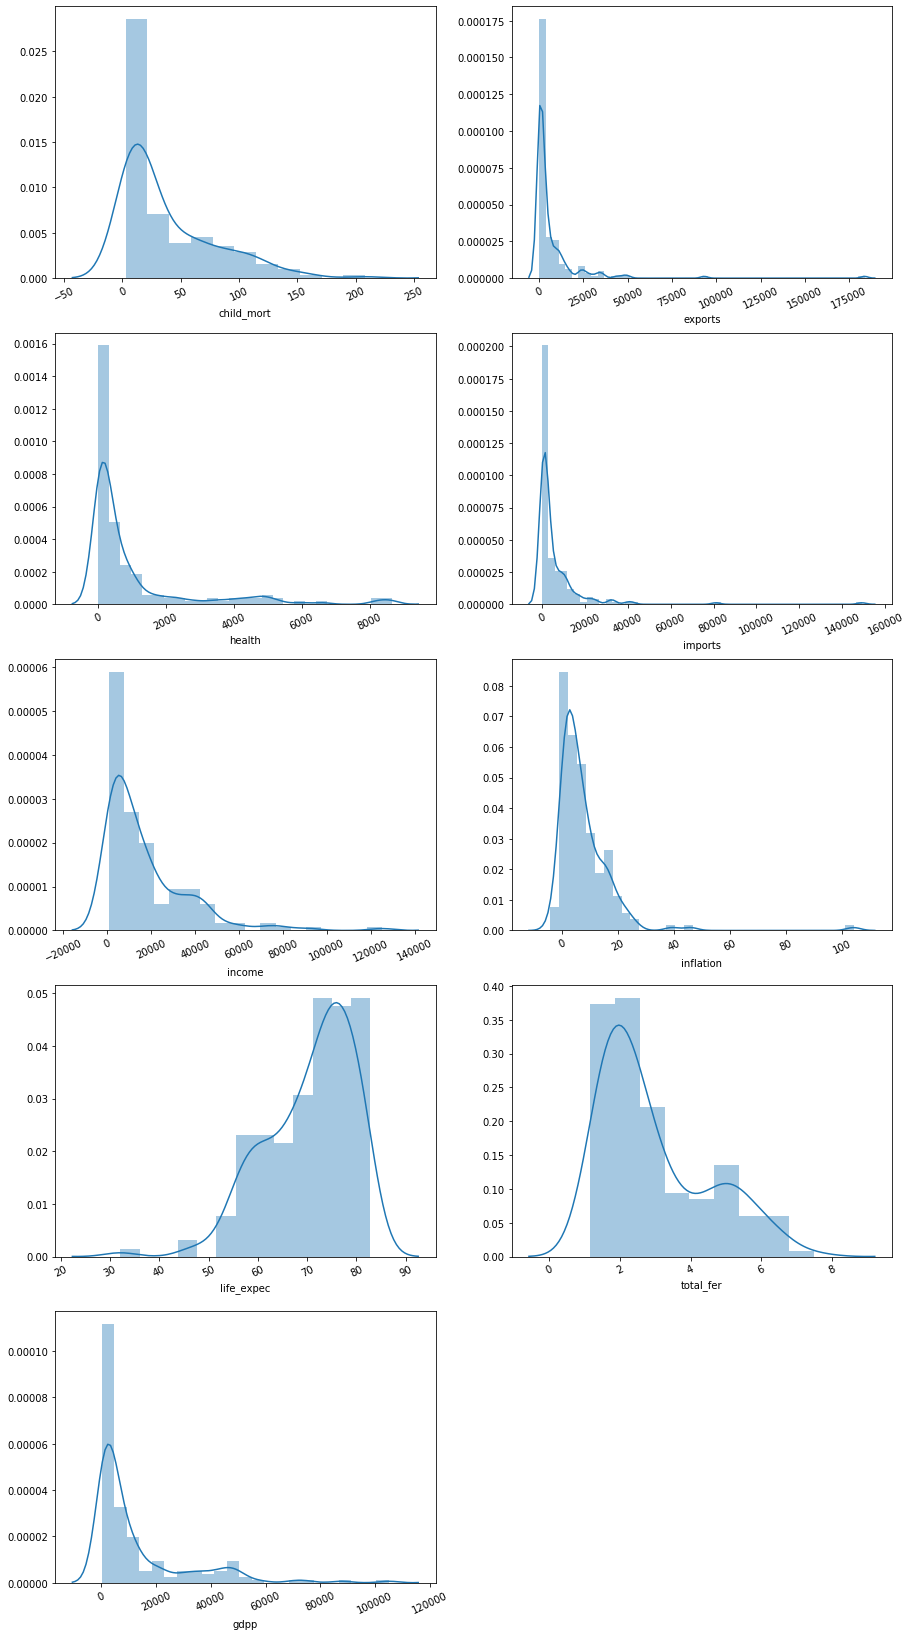

In [465]:
# Creating subplots (distribution plots) on various numerical variables
plt.figure(figsize = (15,35))
for i in enumerate(feature):
    plt.subplot(6,2, i[0]+1)
    sns.distplot(countries_df[i[1]])
    plt.xticks(rotation = 25)

- As seen from the above distribution plots, most of the countries are under-developed as seen from the distribution of gdpp, income, health columns etc. As most of the countries are having low gdpp, the same is reflected by the distribution of imports and exports for which the values are concentrated towards the lower end.

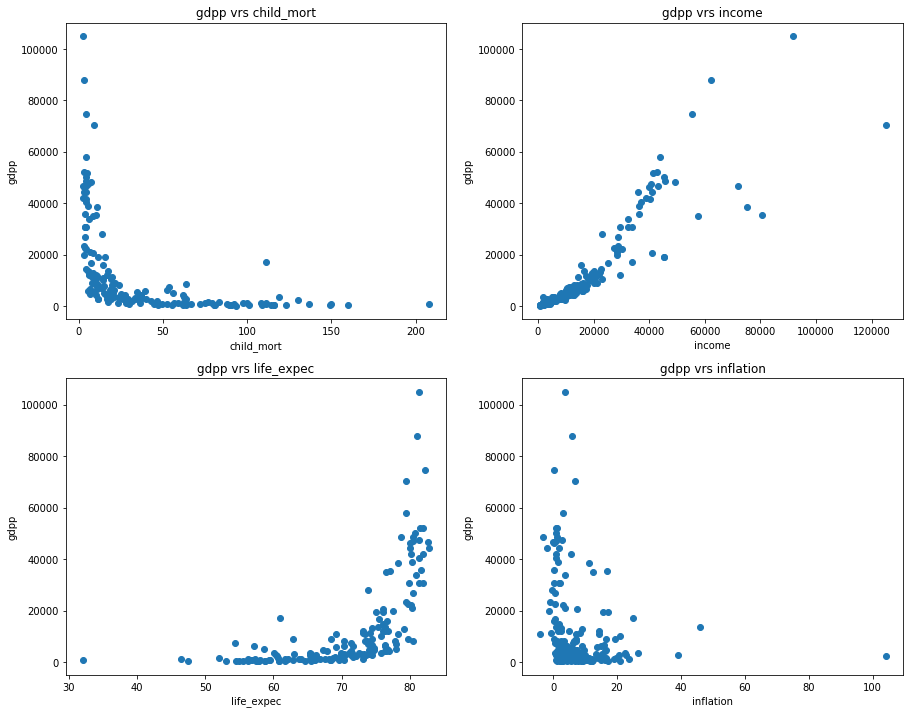

In [466]:
# Bi-variate Analysis for continous-continous variables

plt.figure(figsize = (15,12))

plt.subplot(2,2,1)
plt.title("gdpp vrs child_mort")
plt.xlabel("child_mort")
plt.ylabel("gdpp")
plt.scatter(countries_df['child_mort'], countries_df['gdpp'])

plt.subplot(2,2,2)
plt.title("gdpp vrs income")
plt.xlabel("income")
plt.ylabel("gdpp")
plt.scatter(countries_df['income'], countries_df['gdpp'])

plt.subplot(2,2,3)
plt.title("gdpp vrs life_expec")
plt.xlabel("life_expec")
plt.ylabel("gdpp")
plt.scatter(countries_df['life_expec'], countries_df['gdpp'])

plt.subplot(2,2,4)
plt.title("gdpp vrs inflation")
plt.xlabel("inflation")
plt.ylabel("gdpp")
plt.scatter(countries_df['inflation'], countries_df['gdpp'])


plt.show()


#### Bi-variate graphs

- gdpp vrs child_mort : The scatter plot in the form of L-shape. A large number of countries have low gdpp and in turn high child mortality. These are under-developed countries. There are certain countries with high gdpp and low child mortality which are developed countries.

- gdpp vrs income : As seen from the scatter plot, there is a linear relationship between gdpp and net income per person.

- gdpp vrs life_expec : Countries with high gdpp tends to have high life_expec as compared to countries with low gdpp.

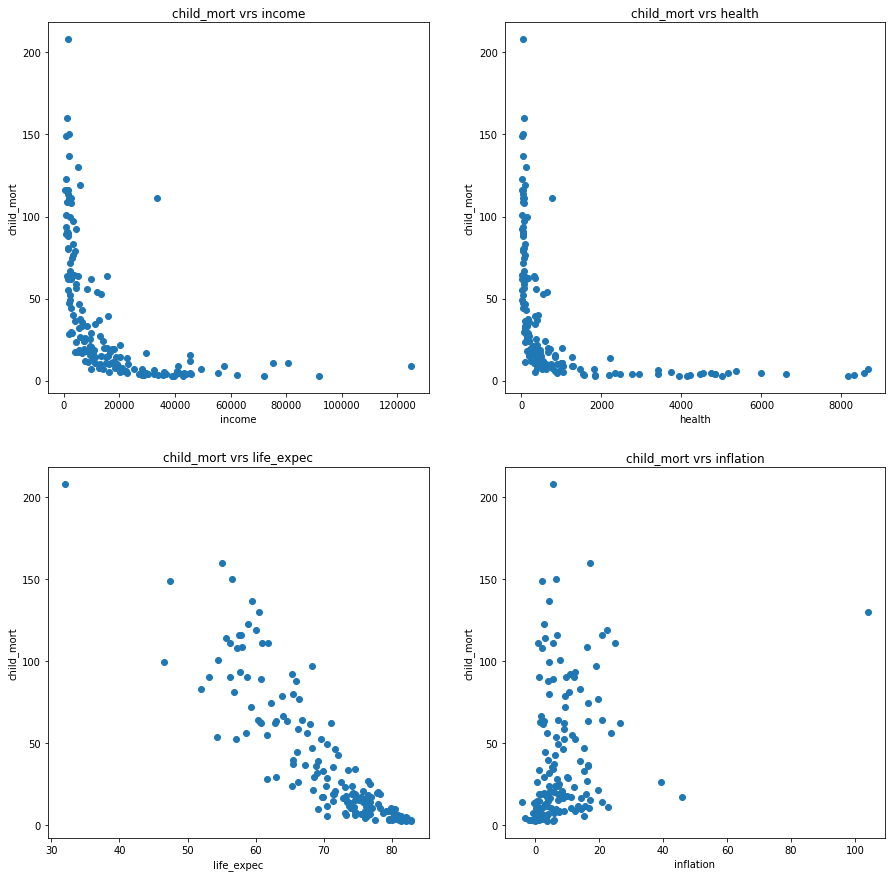

In [467]:
# Bi-variate Analysis for continous-continous variables

plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.title("child_mort vrs income")
plt.xlabel("income")
plt.ylabel("child_mort")
plt.scatter(countries_df['income'], countries_df['child_mort'])

plt.subplot(2,2,2)
plt.title("child_mort vrs health")
plt.xlabel("health")
plt.ylabel("child_mort")
plt.scatter(countries_df['health'], countries_df['child_mort'])

plt.subplot(2,2,3)
plt.title("child_mort vrs life_expec")
plt.xlabel("life_expec")
plt.ylabel("child_mort")
plt.scatter(countries_df['life_expec'], countries_df['child_mort'])

plt.subplot(2,2,4)
plt.title("child_mort vrs inflation")
plt.xlabel("inflation")
plt.ylabel("child_mort")
plt.scatter(countries_df['inflation'], countries_df['child_mort'])


plt.show()


- child_mort vrs income : The scatter plot in the form of L-shape. A large number of countries where net income per person is low tends to have high child mortality. These are under-developed countries. Contrary to this there are developed countries with high net income per person and low child mortality.
- child_mort vrs health : A similar kind of trend of L-shape is seen for this scatter plots and countries with low spending on health tends to have high child mortality.

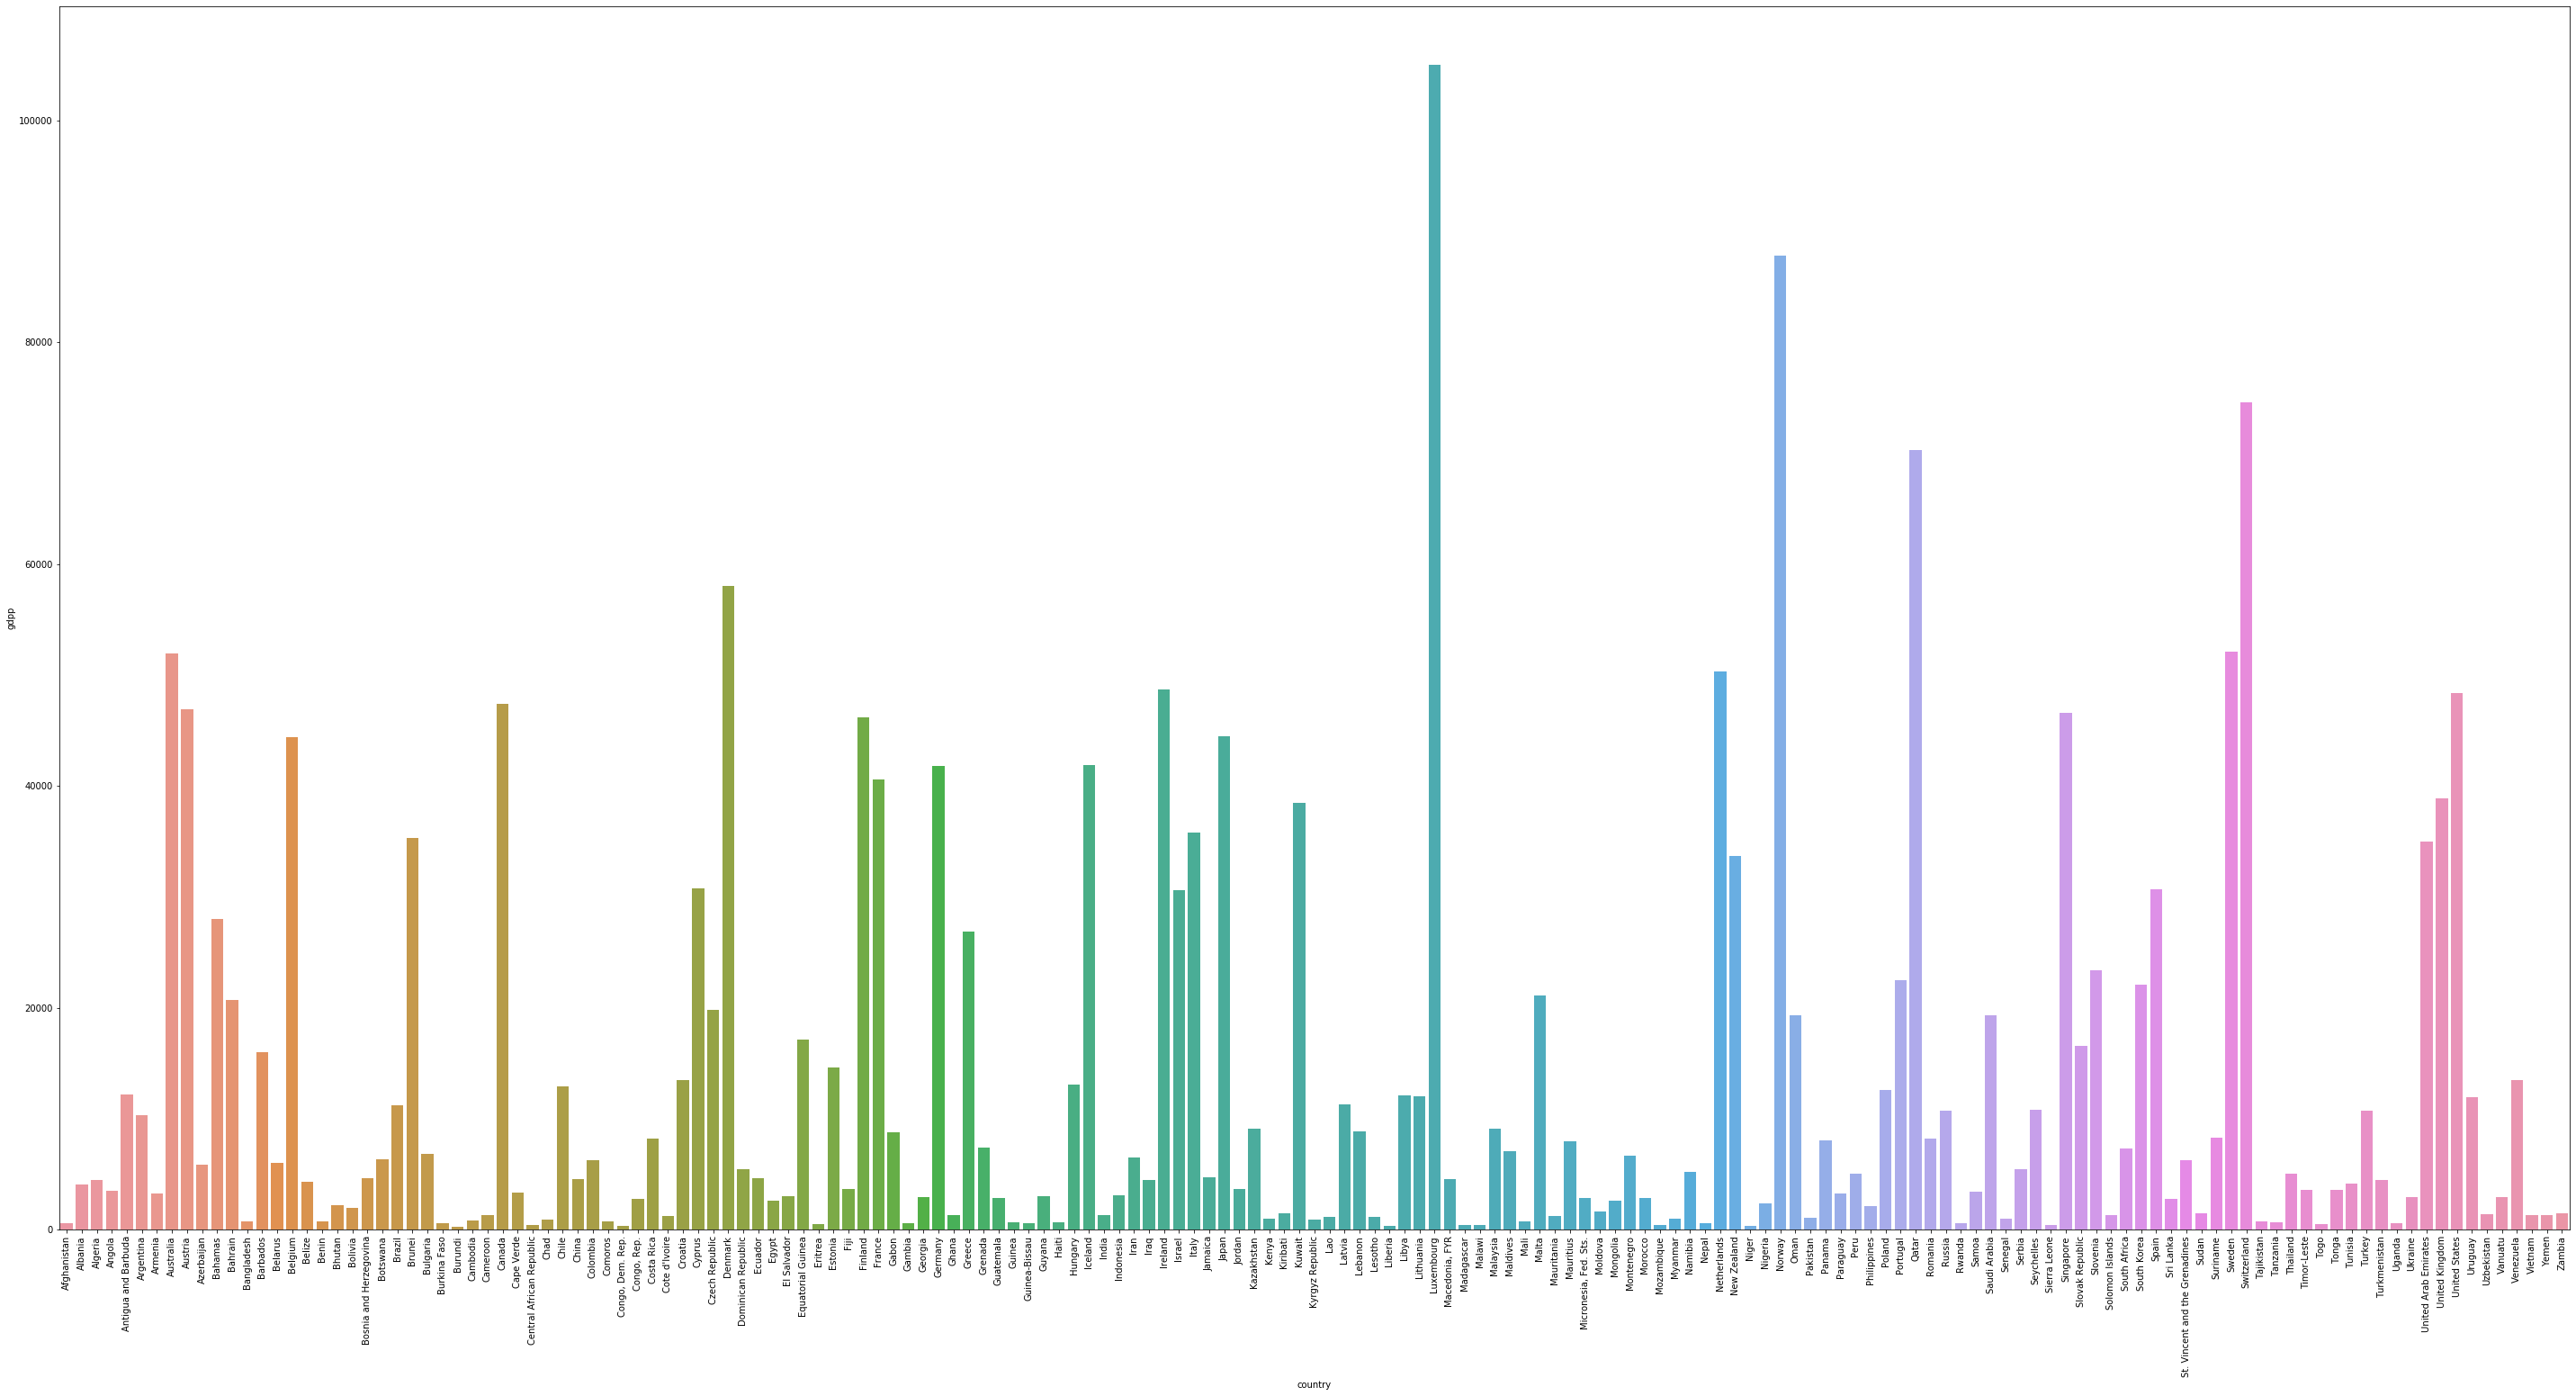

In [468]:
# Bar-plot between gdpp and countries
plt.figure(figsize = (50,25))
sns.barplot(x = countries_df['country'], y = countries_df['gdpp'])
plt.xticks(rotation = 90)
plt.show()

- As seen from the above grapg, "Luxemburg" has the highest gdpp followed by "Norway". Also, there are a lot of countries with very low gdpp, these are under-developed countried which are in urgent need of aid.

## Outlier Treatment

In [469]:
# Checking the columns in the dataframe
countries_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [470]:
# Creating a list of numerical columns
feature = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

In [471]:
list(enumerate(feature))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

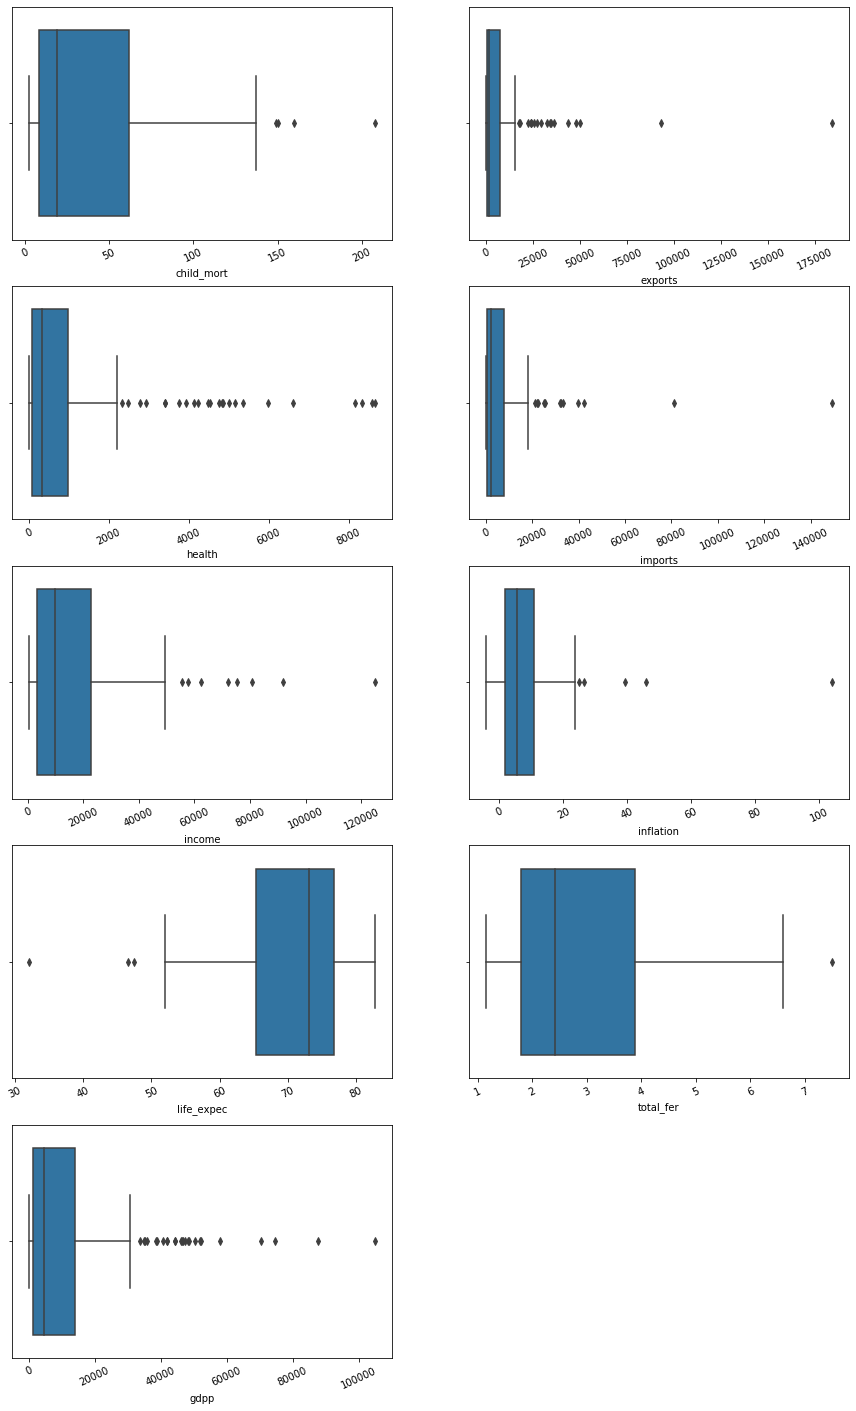

In [472]:
# Plotting the box plots for all the continous variables
plt.figure(figsize = (15, 30))
for i in enumerate(feature):
    plt.subplot(6, 2,i[0]+1)
    sns.boxplot(i[1], data = countries_df)
    plt.xticks(rotation = 25)

- As seen from the above boxplots, there are outliers present above the upper whisker for most of the numerical columns except for 'life_expec'. For 'life_expec' outliers are present below the lower whisker.

- For treatment of outliers, no outlier will be removed, as the number of rows/data provided in the dataset is quite less and by removal of the outliers, analysis will be significantly affected.

- So, for this clustering analysis outliers will be capped. All the outliers above the upper whisker will be capped to 99th percentile expect for column "child_mort" since we are looking for countries with high "child_mort".

- As there are no outliers below the lower whisker for all the columns except for 'life_expec', so no capping has been done for lower range. For column 'life_expec' also no capping is performed as we would like to form cluster with very low 'life_expec'.

In [473]:
# Capping of outliers greater than 99 percentile except for "child_mort" and "inflation"
country_cap = ['exports', 'health', 'imports', 'income', 'life_expec', 'total_fer', 'gdpp']
for j in country_cap:
    cap = countries_df[j].quantile(0.99)
    countries_df[j][countries_df[j]>=cap] = cap

## Clustering

In [474]:
# Checking if the data is suitable for clustering: Hopkin's Test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [475]:
# Value of Hopkin's Statistic
hopkins(countries_df.drop('country', axis=1))

0.9021994149991274

- The value of Hopkin's Statistic comes out be greater than 0.8 over when the algorithm is run multiple times which indicates that the data is fit for Clustering.

## Scaling of Data

In [476]:
# Extracting all the columns except for 'country' on which scaling is to be performed
countries_1 = countries_df.drop('country', axis=1)
countries_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [477]:
# instantiate the object
scaler = StandardScaler()

# Standard scaling by fit_transform over the dataset
countries_1_scaled = scaler.fit_transform(countries_1)
countries_1_scaled.shape

(167, 9)

In [478]:
# Converting the 'countries_1_scaled' into dataframe
countries_1_scaled = pd.DataFrame(countries_1_scaled)
countries_1_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
countries_1_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619705,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.648831,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671403,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179541,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705262,-0.543736,-0.032042


## Modelling using K-means Algorithm

### Optimal number of clusters

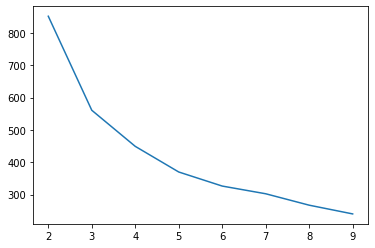

In [479]:
## Finding the optimal number of clusters using elbow-curve
ssd = []
for k in range (2,10):
    kmean = KMeans(n_clusters=k).fit(countries_1_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

- As seen from the above curve, there is sudden change in the slope of the curve at number of clusters = 3, thus choosing the optimal value of k as 3.

In [480]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_1_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(countries_1_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.47849207268358157
For n_clusters=3, the silhouette score is 0.4233188560305591
For n_clusters=4, the silhouette score is 0.40915114586718
For n_clusters=5, the silhouette score is 0.4155933513446923
For n_clusters=6, the silhouette score is 0.31689990210805935
For n_clusters=7, the silhouette score is 0.298321692870854
For n_clusters=8, the silhouette score is 0.25570779901223833


- From the above silhouette scores, it can be seen that the maximum value of silhouette score is maximum for k = 2 but two clusters will not make much sense for our business problem. Hence choosing the value of k as 3 for which also the value of silhouette score is decent.

In [481]:
# Doing Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=50)
kmeans.fit(countries_1_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [482]:
# Creating the labels
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [483]:
# assigning the labels
countries_df['cluster_id'] = kmeans.labels_
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


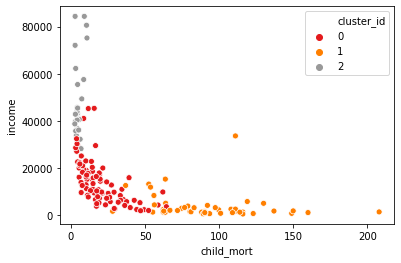

In [484]:
# Plotting the cluster by creating scatter plot between 'child_mort' and 'income'
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = countries_df, palette = 'Set1')

- As seen from the above scatter plot, it can be inferred that there is segment of developed countries represented by the cluster id of 2 which have high income values as child mortality. Contrary to this there are underdeveloped countries represented by cluster id of 1 with high to ver high child mortality and low net income per person.

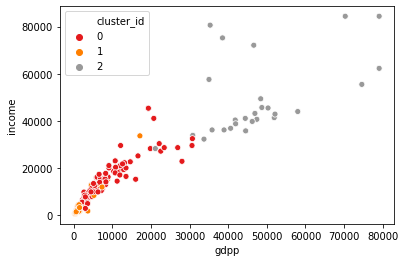

In [485]:
# Plotting the cluster by creating scatter plot between 'gdpp' and 'income'
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = countries_df, palette = 'Set1')

- Again from the above scatter plot, it can be seen that countries with cluster_id as 1 are under-developed countries with very low gdpp and income while countries with cluster_id as 2 are developed countries with high to very high gdpp as well as high income.

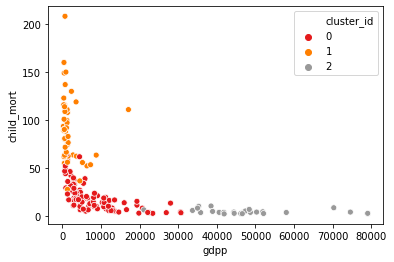

In [486]:
# Plot the cluster
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = countries_df, palette = 'Set1')

- Similarly from the above scatter plot it can be seen that, countries with cluster_id as 1 tends to have very low gdpp and high to very high child mortality as opposite to developed countries as cluster_id as 2.

## Cluster Profiling

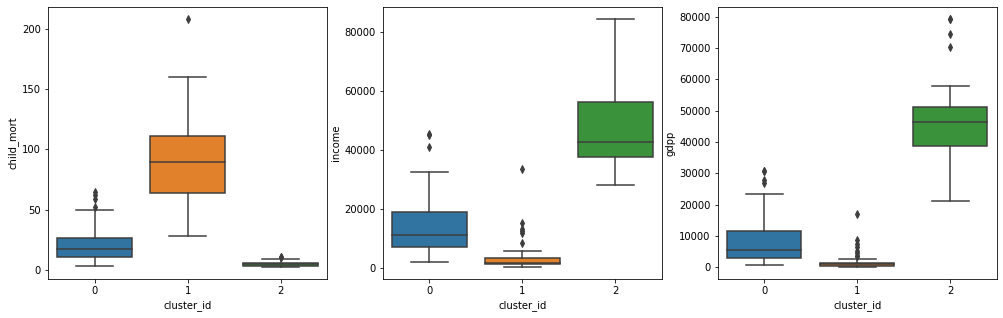

In [487]:
# box plots for cluster profiling
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='child_mort', data=countries_df)

plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='income', data=countries_df)

plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='gdpp', data=countries_df)

- As seen from above box plots, countries with cluster_id = 1 have lowest income, gdpp and highest child mortality. So these are our target countries which are in direst need of aid.

In [488]:
# Filter the data for cluster_id = 1
countries_df[countries_df['cluster_id'] == 1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,1
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,1
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1


In [489]:
# Sorting the data as per the countries which are in direst need of aid
countries_df[countries_df['cluster_id'] == 1].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,1


#### Top 5 countries which are in direst need of aid as per the k-means clustering are:
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

## Hierarchical Clustering

In [490]:
# Checking the head of scaled columns
countries_1_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619705,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.648831,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671403,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179541,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705262,-0.543736,-0.032042


In [491]:
# Checking the head of original dataframe
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


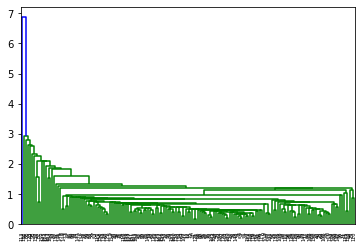

In [492]:
# Creating Dendrogram with single linkage
mergings = linkage(countries_1_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

- The above dendrogram is not very interpretable. Hence, creating dedrogram with complete linkage criteria.

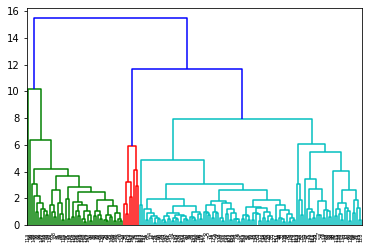

In [493]:
# complete linkage
mergings = linkage(countries_1_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

- As seen from the above dedrogram, there are three cluster forming which are represented by three different colours of green, red and blue. So, choosing the number of clusters as three for further analysis.

In [494]:
# Creating clusters labels
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [495]:
# assigning cluster labels
countries_df['cluster_labels'] = cluster_labels
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


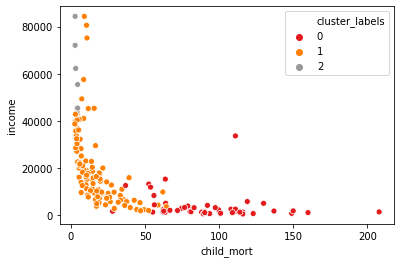

In [496]:
# Plotting the cluster with scatter plot between child_mort and income
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_labels', data = countries_df, palette = 'Set1')

- As seen from the above graph, the countries with cluster_id = 0 are underdeveloped as they are having higest child mortality and lowest income in contrary to cluster_id = 2 which are developed countries.

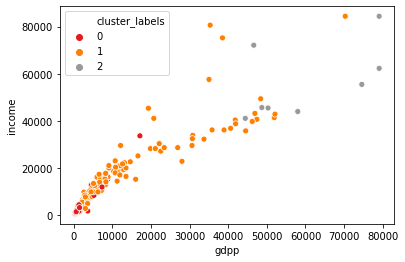

In [497]:
# Plot the cluster
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_labels', data = countries_df, palette = 'Set1')

- As seen from the above graph, the countries with cluster_id = 0 are under-developed as they are having lowest income as well as lowest gdpp in contrary to cluster_id = 2 which are developed countries.

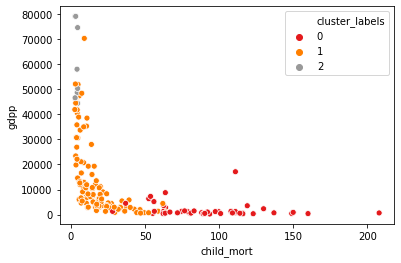

In [498]:
# Plot the cluster
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_labels', data = countries_df, palette = 'Set1')

- As seen from the above graph, the countries with cluster_id = 0 are under-developed as they are having low to very low gdpp and high child mortality in contrary to cluster_id = 2 which are developed countries.

## Cluster Profiling

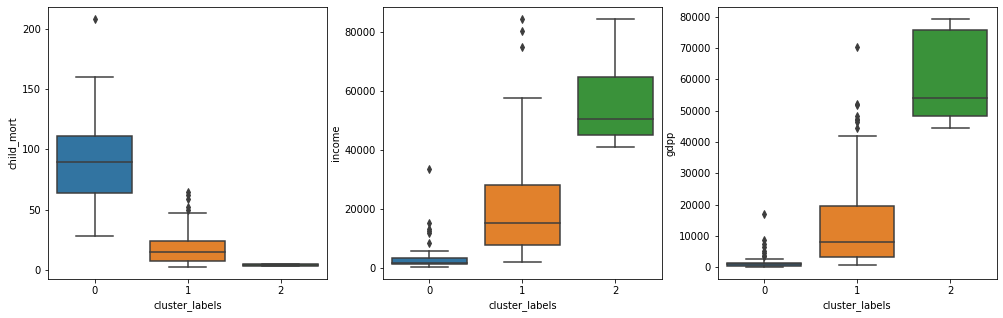

In [499]:
# box plots for cluster profiling
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels', y='child_mort', data=countries_df)

plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels', y='income', data=countries_df)

plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels', y='gdpp', data=countries_df)

- As seen from above box plots, countries with cluster_id = 0 have lowest income, gdpp and highest child mortality. So these are our target countries which are in direst need of aid.

In [500]:
# Filter the data for cluster_labels = 0
countries_df[countries_df['cluster_labels'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,1,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,1,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,1,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1,0


In [501]:
# Sorting the data as per the countries which are in direst need of aid
countries_df[countries_df['cluster_labels'] == 0].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,1,0


#### From the Hierarchical Clustering, the Top-5 countries which are in need of urgert AID are :
1. Burundi
2. Liberia 
3. Congo, Dem. Rep 
4. Niger 
5. Sierra Leone